# ROC Curve

### ROC curve is a curve which is plotted against true positive rate and false positive rate. It is used to measure the performance of two models. The area under the curve(AUC) depicts the performance. More AUC = More performance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#generate 2 datasets
x,y=make_classification(n_samples=1000,n_classes=2,n_features=20,random_state=27)

#split into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=27)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

log_regressor = LogisticRegression().fit(x_train,y_train)

d_class = RandomForestClassifier().fit(x_train,y_train)

#predict probabilities
pred_pob1 = log_regressor.predict_proba(x_test)
pred_pob2 = d_class.predict_proba(x_test)

In [12]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr1,tpr1,thresh1 = roc_curve(y_test,pred_pob1[:,1],pos_label=1)
fpr2,tpr2,thresh2 = roc_curve(y_test,pred_pob2[:,1],pos_label=1)

random_probs = [0 for i in range(len(y_test))]

p_fpr,p_tpr,_=roc_curve(y_test,random_probs,pos_label=1)

In [13]:
auc_score1=roc_auc_score(y_test,pred_pob1[:,1])
auc_score2=roc_auc_score(y_test,pred_pob2[:,1])

print(auc_score1,auc_score2)

0.9762374461979914 0.9817297345767575


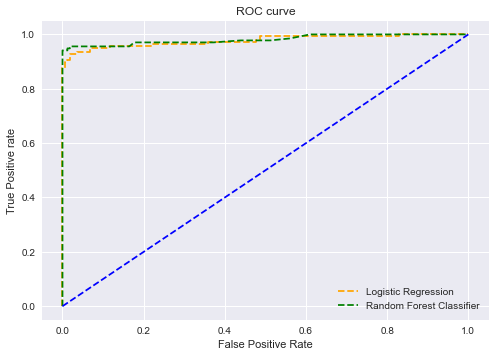

In [15]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();
